In [2]:
%load_ext autotime

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


time: 994 ms


In [19]:
import sys
sys.path.extend(["../"])
from core.tools.data_import import *
from core.tools.time_series import *
from core.tools.visualize import *
from core.models.baseline_rnn import *
from constants import *

time: 3.22 ms


In [5]:
# Select a source of file.
pprint(UNRATE_DIR)
file_dir_selected = input("Select Directory ")

{'EC2': '/home/ec2-user/code/AnnEconForecast/data/UNRATE.csv',
 'MAC': '/Users/tianyudu/Documents/Academics/EconForecasting/AnnEconForecast/data/UNRATE.csv'}
Select Directory EC2
time: 1.65 s


In [6]:
# Pre-processing Parameters
PERIODS = 1
ORDER = 1
LAGS = 48

time: 424 µs


In [7]:
df = load_dataset(UNRATE_DIR[file_dir_selected])
prepared_df = differencing(df, periods=PERIODS, order=ORDER)
prepared_df.head()

Dataset loaded.    
	Index type: datetime64[ns]    
	Data type: float64


,UNRATE_period1_order1
DATE,
1948-01-01,NaN
1948-02-01,0.4
1948-03-01,0.2
1948-04-01,-0.1
1948-05-01,-0.4


time: 20.8 ms


In [8]:
X_raw, y_raw = gen_supervised_sequence(
    prepared_df, LAGS, prepared_df.columns[0], sequential_label=True)

Total 800 observations generated.
Note: shape format: (num_obs, time_steps, num_inputs/outputs)
X shape = (800, 48, 1), y shape = (800, 48, 1)
time: 58.8 ms


In [10]:
X_raw = X_raw.reshape(-1, LAGS,)
y_raw = y_raw.reshape(-1, LAGS,)
print(X_raw.shape, y_raw.shape)

(800, 48) (800, 48)
time: 815 µs


In [11]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_raw, y_raw,
    test_size=0.2,
    shuffle=False
)

(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train,
    test_size=0.2,
    shuffle=False
)

time: 1.9 ms


In [12]:
# Expand dimension so it fits the RNN input place holder.
# (Num_Sample, time_steps, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

time: 773 µs


In [13]:
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

time: 629 µs


In [14]:
print(f"Training and testing set generated,\
\nX_train shape: {X_train.shape}\
\ny_train shape: {y_train.shape}\
\nX_test shape: {X_test.shape}\
\ny_test shape: {y_test.shape}\
\nX_validation shape: {X_val.shape}\
\ny_validation shape: {y_val.shape}")

Training and testing set generated,
X_train shape: (512, 48, 1)
y_train shape: (512, 48, 1)
X_test shape: (160, 48, 1)
y_test shape: (160, 48, 1)
X_validation shape: (128, 48, 1)
y_validation shape: (128, 48, 1)
time: 920 µs


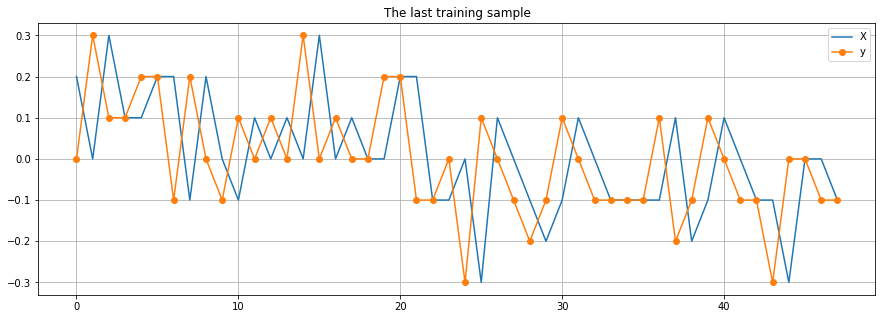

time: 185 ms


In [16]:
# One Sample
plt.figure(figsize=(15, 5))
plt.title("The last training sample")
plt.plot(X_train[-1])
plt.plot(y_train[-1], "-o")
plt.legend(["X", "y"])
plt.grid(True)
plt.show()

In [17]:
# Model Parameters
num_time_steps = LAGS
# Number of series used to predict. (including concurrent)
num_inputs = 1
num_outputs = 1
num_neurons = 64
# Number of output series
learning_rate = 0.03
epochs = 1000
# Training Settings
report_periods = 100

time: 633 µs


In [18]:
parameters = {
    "num_time_steps": LAGS,
    "num_inputs": 1,
    "num_outputs": 1,
    "num_neurons": 64,
    "learning_rate": 0.1
}

time: 515 µs


In [20]:
model = BaselineRnn(para=parameters, sequential_label=True)

BaselineRnn: loading parameters
Building placeholders...


TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'dict'.

time: 90.6 ms
